In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

In [5]:
# 데이터 준비
Data_set = np.loadtxt('https://raw.githubusercontent.com/SoongMoo/soldesk20231218/main/data/ThoraricSurgery3.csv',delimiter=',')
x = Data_set[:,0:16] # 환자의 진찰 기록을 x로 지정
y = Data_set[:,16]   # 수술 후 사망/생존 여부를 y로 지정

Data_set

array([[ 1.  ,  2.88,  2.16, ...,  0.  , 60.  ,  0.  ],
       [ 2.  ,  3.4 ,  1.88, ...,  0.  , 51.  ,  0.  ],
       [ 2.  ,  2.76,  2.08, ...,  0.  , 59.  ,  0.  ],
       ...,
       [ 2.  ,  3.04,  2.08, ...,  0.  , 52.  ,  0.  ],
       [ 2.  ,  1.96,  1.68, ...,  0.  , 79.  ,  0.  ],
       [ 2.  ,  4.72,  3.56, ...,  0.  , 51.  ,  0.  ]])

In [6]:
# 구조 결정
model = Sequential()

# 딥러닝 모델의 구조를 결정
model.add(Dense(30,input_dim=16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [8]:
# 모델 실행
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# 딥 러닝 모델을 실행
history = model.fit(x,y, epochs=5,batch_size=16)

Epoch 1/5
30/30 [==============================] - 1s 1ms/step - loss: 0.4271 - accuracy: 0.8511
Epoch 2/5
30/30 [==============================] - 0s 1ms/step - loss: 0.4199 - accuracy: 0.8489
Epoch 3/5
30/30 [==============================] - 0s 1ms/step - loss: 0.4251 - accuracy: 0.8489
Epoch 4/5
30/30 [==============================] - 0s 1ms/step - loss: 0.4157 - accuracy: 0.8489
Epoch 5/5
30/30 [==============================] - 0s 1ms/step - loss: 0.4539 - accuracy: 0.8489


In [10]:
x1 = np.array([2,4,6,8])
y1 = np.array([81,93,91,97])

In [17]:
mx = np.mean(x1)
my = np.mean(y1)
print(mx,my)

# 기울기의 분모부분
l = [((i - mx)**2) for i in x1]
divisor = sum(l)

# 기울기의 분자부분
def top(x,mx,y,my):
    d = 0
    for i in range(len(x)):
        d += (x[i] - mx) * (y[i] - my)
    return d
divided = top(x1,mx,y1,my)

# 기울기 a를 구하는 공식
a = divided / divisor
print(a)

# y 절편 b구하기
b = my - (mx * a)
print(b)

5.0 90.5
2.3
79.0


In [30]:
fake_a = 3
fake_b = 76

def predict(x):
    return fake_a * x + fake_b

# 예측 값이 들어갈 빈 리스트
predict_result=[]

for i in range(len(x1)):
    predict_result.append(predict(x1[i]))
    print(x1[i],y1[i],predict_result[i],y1[i]-predict_result[i])

# 평균 제곱 오차 함수
n = len(x1)
def mse(y,y_pred):
    return (1/n) * sum((y - y_pred) ** 2)
print("평균 제곱 오차 : ",mse(y1, predict_result))

2 81 82 -1
4 93 88 5
6 91 94 -3
8 97 100 -3
평균 제곱 오차 :  11.0


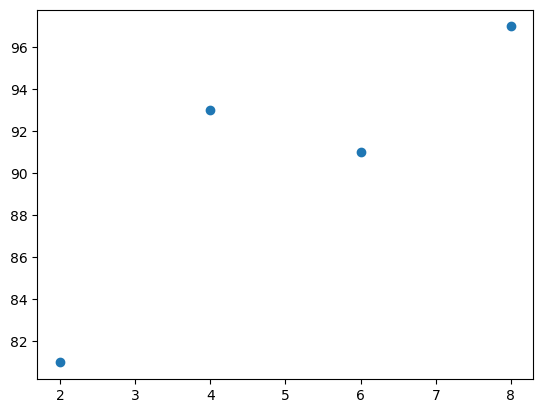

In [32]:
import matplotlib.pyplot as plt
plt.scatter(x1,y1)
plt.show()

In [36]:
# 기울기, 절편 값 초기화
a = 0
b = 0

# 학습률
lr = 0.03

# 몇 번 반복될지를 정하기
epochs = 2001

# x 값이 총 몇개인지 셉니다
n = len(x1)

# 경사하강법 시작
for i in range(epochs):
    # 예측 값 구하는 식
    y_pred = a * x1 + b
    error = y1 - y_pred

    # 오차 함수를 a로 편미분
    a_diff = (2/n) * sum(-x1 *(error))

    # 오차 함수를 b로 편미분
    b_diff = (2/n) * sum(-(error))

    # 학습률을 곱해서 값을 구한다.
    a = a - lr * a_diff
    b = b - lr * b_diff
    if i % 100 == 0:
        print(i,a,b)
    

0 27.84 5.43
100 7.073858435872394 50.51166161138297
200 4.095999380762421 68.28224379060177
300 2.9756829100119027 74.96781336233505
400 2.5542024233262106 77.48302865233052
500 2.3956349066513707 78.42929177728175
600 2.3359793398132864 78.78529068727728
700 2.313535987420573 78.91922301600925
800 2.3050924490666174 78.96961044185792
900 2.3019158585694823 78.98856697541248
1000 2.3007207758016315 78.99569871827002
1100 2.300271167070735 78.99838179089187
1200 2.3001020172709508 78.9993912045567
1300 2.300038380484562 78.99977096168232
1400 2.3000144393354365 78.9999138322214
1500 2.3000054323026444 78.99996758234106
1600 2.300002043716771 78.99998780397235
1700 2.3000007688780433 78.99999541166466
1800 2.300000289263884 78.99999827379686
1900 2.3000001088255795 78.9999993505755
2000 2.3000000409418653 78.99999975567644


In [37]:
x = np.array([2,4,6,8])
y = np.array([81,93,91,97])

model = Sequential()
#             출력갯수 , 입력갯수 , 학습 방법
model.add(Dense(1 , input_dim=1, activation = 'linear'))  # linear = 선형 회귀 : 활성화 함수

# 오차 수정을 위해 경사 하강법   (sgd = 경사 하강법)  , 오차의 정도를 판단  (mse = 평균 제곱 오차)
model.compile(optimizer="sgd",loss="mse")

# epochs = 시행 횟수
model.fit(x,y,epochs=2000)

Epoch 1/2000
1/1 [==============================] - 0s 240ms/step - loss: 8702.9492
Epoch 2/2000
1/1 [==============================] - 0s 5ms/step - loss: 2108.7637
Epoch 3/2000
1/1 [==============================] - 0s 4ms/step - loss: 1134.9102
Epoch 4/2000
1/1 [==============================] - 0s 4ms/step - loss: 986.5784
Epoch 5/2000
1/1 [==============================] - 0s 5ms/step - loss: 959.5291
Epoch 6/2000
1/1 [==============================] - 0s 5ms/step - loss: 950.3274
Epoch 7/2000
1/1 [==============================] - 0s 5ms/step - loss: 943.7808
Epoch 8/2000
1/1 [==============================] - 0s 5ms/step - loss: 937.6580
Epoch 9/2000
1/1 [==============================] - 0s 4ms/step - loss: 931.6308
Epoch 10/2000
1/1 [==============================] - 0s 4ms/step - loss: 925.6507
Epoch 11/2000
1/1 [==============================] - 0s 4ms/step - loss: 919.7106
Epoch 12/2000
1/1 [==============================] - 0s 5ms/step - loss: 913.8093
Epoch 13/2000
1/1 [=

In [39]:
hour = 7
# 모델에 대한 결과 확인?
prediction = model.predict([hour])
print(f"내가 {hour}시간 공부하면? 예측된 점수는 {prediction}")

1/1 [==============================] - 0s 26ms/step
내가 7시간 공부하면? 예측된 점수는 [[95.11995]]


In [42]:
x = np.array([[2,0],[4,4],[6,2],[8,3]])
y = np.array([81,93,91,97])

model = Sequential()
#             출력갯수 , 입력갯수 , 학습 방법
model.add(Dense(1 , input_dim=2, activation = 'linear'))  # linear = 선형 회귀 : 활성화 함수

# 오차 수정을 위해 경사 하강법   (sgd = 경사 하강법)  , 오차의 정도를 판단  (mse = 평균 제곱 오차)
model.compile(optimizer="sgd",loss="mse")

# epochs = 시행 횟수
model.fit(x,y,epochs=2000)

Epoch 1/2000
1/1 [==============================] - 0s 189ms/step - loss: 7646.4502
Epoch 2/2000
1/1 [==============================] - 0s 0s/step - loss: 1399.5327
Epoch 3/2000
1/1 [==============================] - 0s 4ms/step - loss: 954.7296
Epoch 4/2000
1/1 [==============================] - 0s 0s/step - loss: 918.0224
Epoch 5/2000
1/1 [==============================] - 0s 11ms/step - loss: 910.0509
Epoch 6/2000
1/1 [==============================] - 0s 3ms/step - loss: 904.1345
Epoch 7/2000
1/1 [==============================] - 0s 0s/step - loss: 898.3965
Epoch 8/2000
1/1 [==============================] - 0s 4ms/step - loss: 892.7049
Epoch 9/2000
1/1 [==============================] - 0s 0s/step - loss: 887.0500
Epoch 10/2000
1/1 [==============================] - 0s 11ms/step - loss: 881.4310
Epoch 11/2000
1/1 [==============================] - 0s 938us/step - loss: 875.8475
Epoch 12/2000
1/1 [==============================] - 0s 10ms/step - loss: 870.2996
Epoch 13/2000
1/1 [=

In [57]:
hour = 7
private_class = 4
# 모델에 대한 결과 확인?
prediction = model.predict([[hour,private_class]])
print(f"내가 {hour}시간 공부하면? 예측된 점수는 {prediction}")

1/1 [==============================] - 0s 37ms/step
내가 7시간 공부하면? 예측된 점수는 [[97.52907]]


In [ ]:
x = np.array([2,4,6,8,10,12,14])
y = np.array([0,0,0,1,1,1,1])

model = Sequential()
model.add(Dense(1,input_dim=1,activation="sigmoid"))
# 오차 수정 : 경사하강법(sgd)
model.compile(optimizer="sgd",loss="binary_crossentropy")
model.fit(x,y,epochs=5000)

Epoch 1/5000
1/1 [==============================] - 0s 297ms/step - loss: 2.4448
Epoch 2/5000
1/1 [==============================] - 0s 4ms/step - loss: 2.1006
Epoch 3/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.7763
Epoch 4/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.4807
Epoch 5/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.2243
Epoch 6/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.0171
Epoch 7/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.8633
Epoch 8/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.7576
Epoch 9/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6888
Epoch 10/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6448
Epoch 11/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6165
Epoch 12/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5979
Epoch 13/5000
1/1 [============================

In [1]:
# 예측
hour = 8
prediction = model.predict([hour])
print(hour,prediction)

NameError: name 'model' is not defined

In [6]:
# 가중치(기울기)와 바이어스(절편)
w11 = np.array([-2,-2])
w12 = np.array([2,2])
w2 = np.array([1,1])

b1 = 3
b2 = -1
b3 = -1

# 퍼셉트론
def MLP(x,w,b):
    y = np.sum(w * x) + b
    if y <= 0:
        return 0
    else:
        return 1

# AND 게이트
def AND(x1,x2):
    return MLP(np.array([x1,x2]),w2,b3)

# OR 게이트
def OR(x1,x2):
    return MLP(np.array([x1,x2]),w12,b2)

# NAND 게이트
def NAND(x1,x2):
    return MLP(np.array([x1,x2]),w11,b1)

# XOR 게이트
def XOR(x1,x2):
    return AND(NAND(x1,x2) , OR(x1,x2))

for x in [(0,0),(1,0),(0,1),(1,1)]:
    y = XOR(x[0],x[1])
    print(x[0],x[1],y)

0 0 0
1 0 1
0 1 1
1 1 0
